# Cost Function Tester

In [1]:
import json
import uproot
import numpy as np
from scipy import stats
from importlib import reload
from functools import reduce
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def jsl(fn):
    x = []
    with open(fn,'r') as f:
        x = json.load(f)
    return x

def jss(d, f):
    with open(f,'w') as file:
        json.dump(d, file, sort_keys=True, indent=4, separators=(',', ': '))

./ACTFWGenericMaterialValidationExample -n1000 --output-root on

mv propagation-material.root propagation-material-input.root

---
./ACTFWGenericGeometryExample --mat-input-type proto --mat-output-file proto-layer-material-N --mat-output-sensitives off --mat-output-data off --output-json on -n1 --nbins N

./ACTFWGenericMaterialMappingExample -n 1000000 --mat-input-type file --mat-input-file proto-layer-material-N.json --mat-output-file mapped-binned-proto-N --output-json on --input-root on --input-files propagation-material-input.root -j1

./ACTFWGenericMaterialValidationExample -n1000 --mat-input-type file --mat-input-file mapped-binned-proto-N.json --output-root on

mv propagation-material.root propagation-material-N.root

In [2]:
def gen_cmds(nbins, nevents=1000):
    print("./ACTFWGenericMaterialValidationExample -n{0} --output-root on".format(nevents))
    print("mv propagation-material.root propagation-material-input-{0}.root".format(nevents))
    print("./ACTFWGenericGeometryExample --mat-input-type proto --mat-output-file proto-layer-material-{0} --mat-output-sensitives off --mat-output-data off --output-json on -n1 --nbins {0}".format(nbins))
    print("./ACTFWGenericMaterialMappingExample -n{1} --mat-input-type file --mat-input-file proto-layer-material-{0}.json --mat-output-file mbp-{0}-{2} --output-json on --input-root on --input-files propagation-material-input-{2}.root -j1".format(nbins, nevents*1000, nevents))

    #     print("./ACTFWGenericMaterialValidationExample -n1000 --mat-input-type file --mat-input-file mapped-binned-proto-{0}.json --output-root on".format(nbins))
#     print("mv propagation-material.root propagation-material-{0}.root".format(nbins))

#     print("mv proto-layer-material-{0}.json plm-{0}-{1}.json".format(nbins, nevents))
    print("./PMM -n1 --mat-input-type file --mat-input-file mbp-{0}-{1}.json -j1".format(nbins, nevents))
    print("mv output_prop.ply op_{0}_{1}.ply\n\n".format(nbins,nevents))

gen_cmds(40, 100000)

./ACTFWGenericMaterialValidationExample -n100000 --output-root on
mv propagation-material.root propagation-material-input-100000.root
./ACTFWGenericGeometryExample --mat-input-type proto --mat-output-file proto-layer-material-40 --mat-output-sensitives off --mat-output-data off --output-json on -n1 --nbins 40
./ACTFWGenericMaterialMappingExample -n100000000 --mat-input-type file --mat-input-file proto-layer-material-40.json --mat-output-file mbp-40-100000 --output-json on --input-root on --input-files propagation-material-input-100000.root -j1
./PMM -n1 --mat-input-type file --mat-input-file mbp-40-100000.json -j1
mv output_prop.ply op_40_100000.ply




In [18]:
# gen_mat = jsl('generic-material.json')
# proto_layer_mat = jsl('proto-layer-material.json')
# mapped_binned = jsl('mapped-binned.json')
# mapped_binned_proto = jsl('mapped-binned-proto.json')
# mapped_binned_proto_20 = jsl('mapped-binned-proto-20.json')
# mapped_binned_proto_40 = jsl('mapped-binned-proto-40.json')

file1 = uproot.open("propagation-material-source.root")
file2 = uproot.open("propagation-material-20.root")
file3 = uproot.open("propagation-material-40.root")
file4 = uproot.open("propagation-material-1.root")
file5 = uproot.open("propagation-material-100.root")

for f in [file1, file2, file3, file4, file5]:
    for k in f.keys():
        print(k, f[k].array('v_x').shape)

b'material-tracks;14' (1000000,)
b'material-tracks;13' (983723,)
b'material-tracks;7' (1000000,)
b'material-tracks;6' (867972,)
b'material-tracks;7' (999994,)
b'material-tracks;6' (887982,)
b'material-tracks;8' (1000000,)
b'material-tracks;7' (947394,)
b'material-tracks;7' (996131,)
b'material-tracks;6' (917142,)


In [19]:
data_source = file1['material-tracks'].arrays(['v_eta', 't_X0'])
data_bin_20 = file2['material-tracks'].arrays(['v_eta', 't_X0'])
data_bin_40 = file3['material-tracks'].arrays(['v_eta', 't_X0'])
data_bin_5  = file4['material-tracks'].arrays(['v_eta', 't_X0'])
data_bin_100= file5['material-tracks'].arrays(['v_eta', 't_X0'])

data_source[b'name'] = 'source'
data_bin_20[b'name'] = 'bin 20'
data_bin_40[b'name'] = 'bin 40'
data_bin_5 [b'name'] = 'bin 1'
data_bin_100[b'name']= 'bin 100'

In [20]:
h1 = stats.binned_statistic(data_source[b'v_eta'], data_source[b't_X0'], 'mean', bins=100)
# h2 = stats.binned_statistic(data_bin_20[b'v_eta'], data_bin_20[b't_X0'], 'mean', bins=100)
# h3 = stats.binned_statistic(data_bin_40[b'v_eta'], data_bin_40[b't_X0'], 'mean', bins=100)

def ssd(y1, y2):
    return np.square(y1-y2).sum()

# ssd(h1.statistic, h2.statistic), ssd(h1.statistic, h3.statistic)

for d in [data_bin_5, data_bin_20, data_bin_40, data_bin_100]:
    hd = stats.binned_statistic(d[b'v_eta'], d[b't_X0'], 'mean', bins=100)
    print(d[b'name'], ':',ssd(h1.statistic, hd.statistic))

bin 1 : 0.00048410177573826883
bin 20 : 0.17207944377200757
bin 40 : 0.2902535301146842
bin 100 : 0.5663498713893187


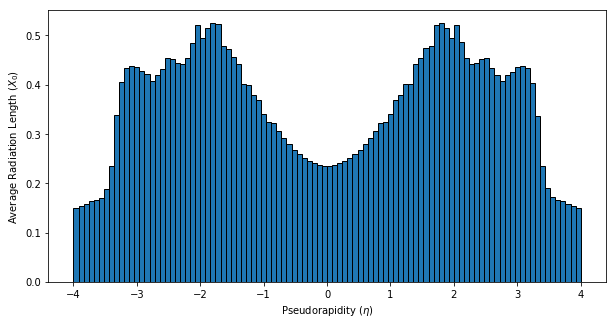

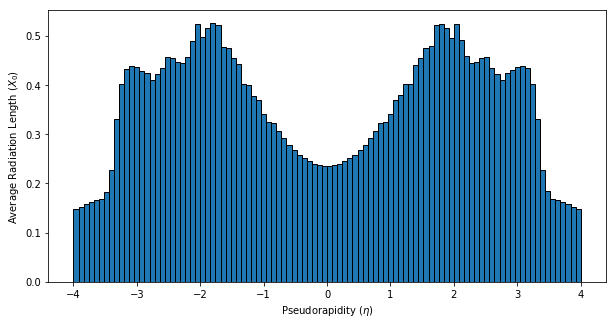

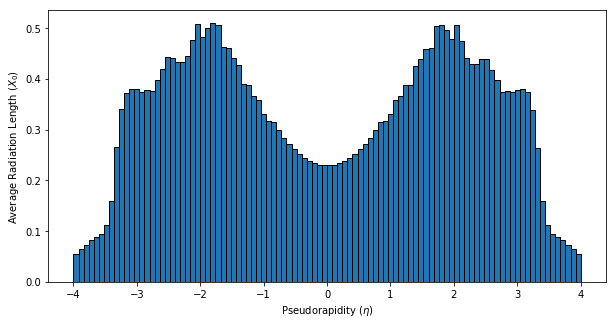

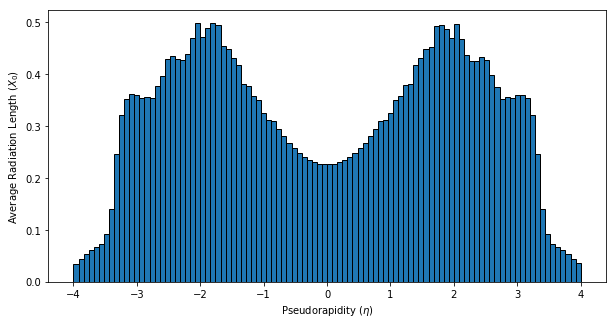

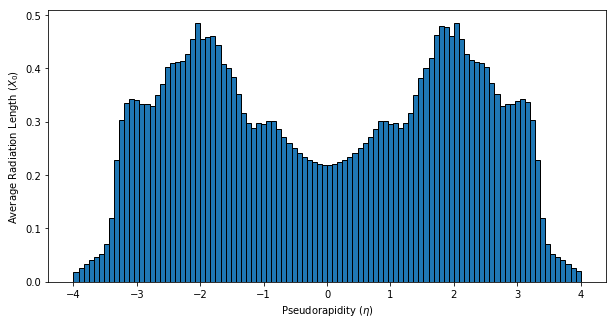

In [21]:
for d in [data_source, data_bin_5, data_bin_20, data_bin_40, data_bin_100]:
    h = stats.binned_statistic(d[b'v_eta'], d[b't_X0'], 'mean', bins=100)
    h_centres = list(map(lambda x: sum(x)/2, zip(h.bin_edges[:-1],h.bin_edges[1:])))

    plt.figure(figsize=(10,5))
    plt.bar(h_centres, h.statistic, linewidth=1, edgecolor='k', width=0.08)
    plt.xlabel(r"Pseudorapidity ($\eta$)")
    plt.ylabel(r"Average Radiation Length ($X_0$)")
    plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:563: RuntimeWarning: invalid value encountered in sqrt
  (flatsum[a] / flatcount[a]) ** 2)


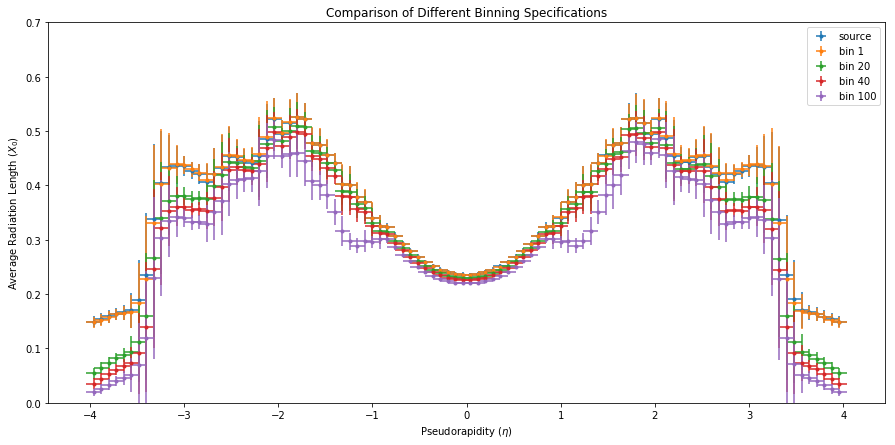

In [23]:
n_bins = 100

plt.figure(figsize=(15,7))

# for d in [data_source, data_bin_5, data_bin_20, data_bin_40, data_bin_100]:
for d in [data_source, data_bin_5, data_bin_20, data_bin_40, data_bin_100]:
#     h = stats.binned_statistic(d[b'v_eta'], d[b't_X0'], 'mean', bins=100)
#     h_centres = list(map(lambda x: sum(x)/2, zip(h.bin_edges[:-1],h.bin_edges[1:])))
    
    
    bin_stdvs, bin_edges, binnumber = stats.binned_statistic(d[b'v_eta'], d[b't_X0'],
        statistic='std', bins=n_bins)
    bin_means, bin_edges, binnumber = stats.binned_statistic(d[b'v_eta'], d[b't_X0'],
        statistic='mean', bins=n_bins)
    
    binnumber[np.where(binnumber>n_bins)] = n_bins
    
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2


#     plt.plot(bin_centers[binnumber-1], d[b't_X0'], 'g.', alpha=0.01)
    
#     plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], lw=3,
#                label='binned statistic of data')
    
    plt.errorbar(bin_centers, bin_means, fmt='.',yerr=bin_stdvs, xerr=[bin_width]*len(bin_stdvs), label=d[b'name'])
    
    plt.xlabel(r"Pseudorapidity ($\eta$)")
    plt.ylabel(r"Average Radiation Length ($X_0$)")
    plt.ylim([0., 0.7])
    plt.legend()

plt.title("Comparison of Different Binning Specifications")
#     plt.title(d[b'name'])
#     plt.show()

In [34]:
file1[b'material-tracks'].pandas.df()

v_x       v_y        v_z       v_px       v_py  \
entry  subentry                                                        
0      0         0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       1         0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       2         0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       3         0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       4         0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       5         0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       6         0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       7         0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       8         0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       9         0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       10        0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       11        0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       12        0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       13        0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       14        0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       15        0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       16        0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       17        0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       18        0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       19        0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       20        0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       21        0.005942 -0.016761  79.271614 -32.603325 -11.558100   
       22        0.005942 -0.016761  79.271614 -32.603325 -11.558100   
1      0        -0.000246 -0.000290 -45.193821  67.729904 -57.540672   
       1        -0.000246 -0.000290 -45.193821  67.729904 -57.540672   
       2        -0.000246 -0.000290 -45.193821  67.729904 -57.540672   
       3        -0.000246 -0.000290 -45.193821  67.729904 -57.540672   
       4        -0.000246 -0.000290 -45.193821  67.729904 -57.540672   
       5        -0.000246 -0.000290 -45.193821  67.729904 -57.540672   
       6        -0.000246 -0.000290 -45.193821  67.729904 -57.540672   
...                   ...       ...        ...        ...        ...   
999998 18       -0.002589 -0.012846 -47.112324 -38.029613   7.665754   
       19       -0.002589 -0.012846 -47.112324 -38.029613   7.665754   
       20       -0.002589 -0.012846 -47.112324 -38.029613   7.665754   
       21       -0.002589 -0.012846 -47.112324 -38.029613   7.665754   
       22       -0.002589 -0.012846 -47.112324 -38.029613   7.665754   
999999 0        -0.023792  0.018838  28.534531  44.771725  56.547283   
       1        -0.023792  0.018838  28.534531  44.771725  56.547283   
       2        -0.023792  0.018838  28.534531  44.771725  56.547283   
       3        -0.023792  0.018838  28.534531  44.771725  56.547283   
       4        -0.023792  0.018838  28.534531  44.771725  56.547283   
       5        -0.023792  0.018838  28.534531  44.771725  56.547283   
       6        -0.023792  0.018838  28.534531  44.771725  56.547283   
       7        -0.023792  0.018838  28.534531  44.771725  56.547283   
       8        -0.023792  0.018838  28.534531  44.771725  56.547283   
       9        -0.023792  0.018838  28.534531  44.771725  56.547283   
       10       -0.023792  0.018838  28.534531  44.771725  56.547283   
       11       -0.023792  0.018838  28.534531  44.771725  56.547283   
       12       -0.023792  0.018838  28.534531  44.771725  56.547283   
       13       -0.023792  0.018838  28.534531  44.771725  56.547283   
       14       -0.023792  0.018838  28.534531  44.771725  56.547283   
       15       -0.023792  0.018838  28.534531  44.771725  56.547283   
       16       -0.023792  0.018838  28.534531  44.771725  56.547283   
       17       -0.023792  0.018838  28.534531  44.771725  56.

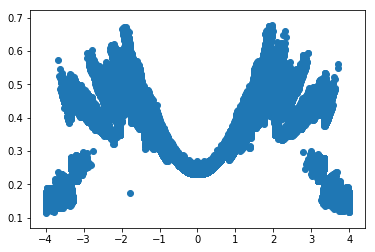

In [185]:

plt.scatter(data_source[b'v_eta'], data_source[b't_X0'])

In [11]:

mats = file1['material-tracks'].pandas.df(['mat_z', 'mat_x', 'mat_y', 'mat_X0'], flatten=True)
mats['mat_r'] = np.sqrt(mats['mat_x']**2 + mats['mat_y']**2)
h = stats.binned_statistic_2d(mats['mat_z'], mats['mat_r'], mats['mat_X0'], 'mean', bins=(1000,1000))

In [12]:
mats['mat_r'] = np.sqrt(mats['mat_x']**2 + mats['mat_y']**2)

In [13]:
# plt.figure(figsize=(16,8))
# plt.scatter(mats['mat_z'][:10000], mats['mat_r'][:10000])

h = stats.binned_statistic_2d(mats['mat_z'], mats['mat_r'], mats['mat_X0'], 'mean', bins=(1000,1000))


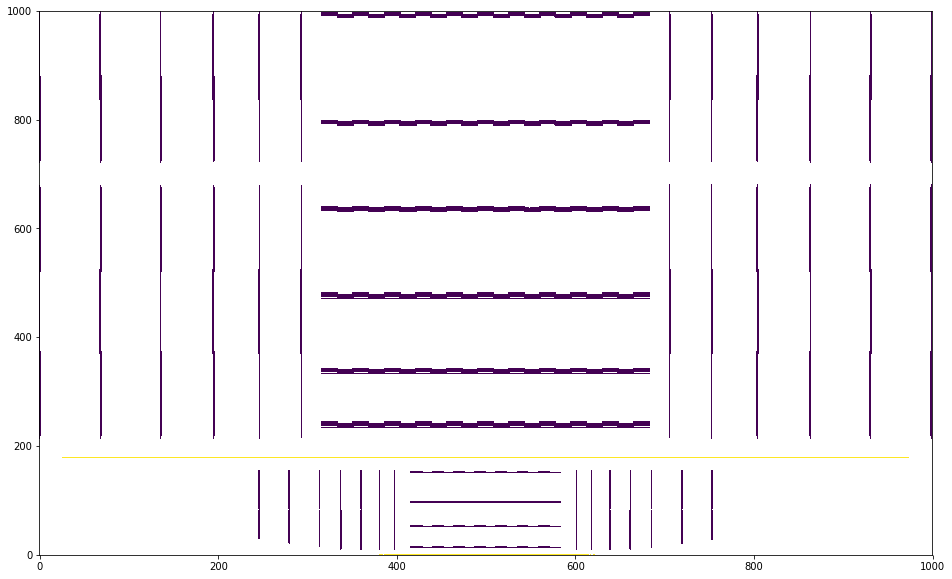

In [14]:
# plt.imshow(np.array(curr['data'])[:,:,key].T)
plt.figure(figsize=(16,10))
plt.imshow(h.statistic.T, origin='lower', aspect='auto')
plt.show()

In [244]:
np.unique(h.statistic)

array([0.01923364, 0.01950921, 0.02492627, 0.02512154, 0.03278103,
       0.03290245, 0.04049041, 0.0406463 , 0.04608794, 0.04617843,
       0.05138526, 0.05204727, 0.07043247, 0.07121685, 0.11979514,
       0.11986103, 0.21963023, 0.21964492, 0.22103561, 0.22104586,
       0.22385191, 0.2238545 , 0.22728202, 0.22813218, 0.22815259,
       0.22902177, 0.2338362 , 0.2338604 , 0.24105402, 0.24107194,
       0.24973865, 0.24981415, 0.26015953, 0.26018578, 0.27215581,
       0.27217107, 0.28595399, 0.28597641, 0.28882136, 0.28892345,
       0.29558501, 0.29575024, 0.29700347, 0.29703302, 0.29706008,
       0.29743343, 0.30075632, 0.30086876, 0.30168794, 0.30171196,
       0.30330423, 0.30349557, 0.31584522, 0.31597903, 0.32926626,
       0.32978129, 0.33229951, 0.33253342, 0.33281087, 0.33293458,
       0.33495323, 0.33709538, 0.339549  , 0.34009604, 0.34187792,
       0.3419357 , 0.35047729, 0.35081433, 0.3510461 , 0.35126531,
       0.37128815, 0.37317333, 0.38228326, 0.38282501, 0.40008

In [16]:
theta = np.arctan(19/3000)
neta = -np.log(np.tan(theta/2))
print(neta)
print(2*np.arctan(np.e**(-4)))

5.7550857966706985
0.03662718246016343


https://gitlab.cern.ch/search?utf8=%E2%9C%93&snippets=&scope=&search=pseudorapidity&project_id=8029


Algorithms/Propagation/include/ACTFW/Propagation/PropagationOptions.hpp